# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)

# Importing Dataset

In [8]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# No Missing Values

In [11]:
df.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

# Encoding Categorical Values

In [12]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [13]:
df[categorical_column]

,Attrition,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime,EducationField
0,1,2,2,0,7,2,1,1
1,0,1,1,1,6,1,0,1
2,1,2,1,1,2,2,1,4
3,0,1,1,0,6,1,1,1
4,0,2,1,1,2,1,0,3
...,...,...,...,...,...,...,...,...
1465,0,1,1,1,2,1,0,3
1466,0,2,1,1,0,1,0,3
1467,0,2,1,1,4,1,1,1
1468,0,1,2,1,7,1,0,3


# Seperating into X and y

In [14]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

# Spliting into Train and Test Sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Applying Random Forest

In [17]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
# Setting random state for randomization
rf = RandomForestClassifier(n_estimators= 10, criterion="entropy", random_state=42)
train_predict_evaluate (rf, X_train, y_train, X_test)




Accuracy:  0.8321995464852607
Precision:  0.5882352941176471
Recall:  0.12987012987012986
Confusion Matrix:
 [[357   7]
 [ 67  10]]


# Hyperparameter Tuning

Randomized Search Cross Validation

In [20]:
np.linspace(start = 100, stop = 1000, num = 10)

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])

In [21]:
from sklearn.model_selection import RandomizedSearchCV

# Taking a huge range of values to get nearer to optimal parameters

# Parameters to check
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 150, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Creating random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [22]:
# Using the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)


In [23]:
# Training model and printing results
train_predict_evaluate (rf_random, X_train, y_train, X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\prabh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy:  0.8412698412698413
Precision:  0.7692307692307693
Recall:  0.12987012987012986
Confusion Matrix:
 [[361   3]
 [ 67  10]]


In [24]:
# Finding the best parameters
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 150,
 'bootstrap': True}

Grid Search Cross Validation

In [25]:
from sklearn.model_selection import GridSearchCV

# After getting near to optimal values, using Random Search CV, 
# we now check for close values using Grid Search CV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [145, 150, 155, 160],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [9, 10, 11],
    'n_estimators': [150, 175, 200, 225, 250]
}


In [26]:
# Grid Search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Results on the Grid Search model
train_predict_evaluate (grid_search, X_train, y_train, X_test)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
Accuracy:  0.8412698412698413
Precision:  0.7692307692307693
Recall:  0.12987012987012986
Confusion Matrix:
 [[361   3]
 [ 67  10]]


In [27]:
# Finding the best parameters
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 145,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 200}

In [28]:
# Hyperparameter Tuning done
# Best parameters found above
# Using these parameters on our Random Forest model for most optimal results
best_rf = RandomForestClassifier(bootstrap=True, max_depth=145, 
                                 min_samples_leaf=1,min_samples_split=9, 
                                 n_estimators=200, random_state=42)
train_predict_evaluate (best_rf, X_train, y_train, X_test)

Accuracy:  0.8412698412698413
Precision:  0.7692307692307693
Recall:  0.12987012987012986
Confusion Matrix:
 [[361   3]
 [ 67  10]]


In [ ]:
# Results of model

# Accuracy:  0.8412698412698413
# Precision:  0.7692307692307693
# Recall:  0.12987012987012986
# Confusion Matrix:
#  [[361   3]
#  [ 67  10]]

# K-Fold Cross Validation

In [35]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  print("Accuracy: ", np.mean(scores['test_accuracy']))
  print("Precision: ", np.mean(scores['test_precision']))
  print("Recall: ", np.mean(scores['test_recall']))
  print("F1 Score: ", np.mean(scores['test_f1']))


Performing K-Fold Cross Validation on our model

In [36]:
# On model without Hyperparameter Tuning
cross_validation(rf, X, y)

Accuracy:  0.8530612244897959
Precision:  0.6813636363636364
Recall:  0.18599290780141842
F1 Score:  0.2865602912829299


In [37]:
# On model with Hyperparameter Tuning
cross_validation(best_rf, X, y)

Accuracy:  0.8619047619047618
Precision:  0.8412198912198912
Recall:  0.18147163120567375
F1 Score:  0.29638931689779147


In [65]:
# K-Fold Results

# Model without Hyperparamter Tuning
# Accuracy:  0.8571428571428571
# Precision:  0.7703030303030303
# Recall:  0.1646276595744681
# F1 Score:  0.2691327643740822

# Model with Hyperparamter Tuning
# Accuracy:  0.8619047619047618
# Precision:  0.8412198912198912
# Recall:  0.18147163120567375
# F1 Score:  0.29638931689779147

# Analysis

In [38]:
# Finding the importance of each feature in the model
# Sorting based on decreasing importance
feature_imp = pd.Series(best_rf.feature_importances_, index=list(X.columns)).sort_values(ascending=False)
print(feature_imp)

MonthlyIncome               0.091960
OverTime                    0.076220
Age                         0.068996
DailyRate                   0.060485
DistanceFromHome            0.051901
TotalWorkingYears           0.050987
HourlyRate                  0.047104
MonthlyRate                 0.046817
YearsAtCompany              0.040582
EnvironmentSatisfaction     0.033210
StockOptionLevel            0.032241
JobRole                     0.030692
YearsWithCurrManager        0.030205
TrainingTimesLastYear       0.029896
JobInvolvement              0.029618
NumCompaniesWorked          0.027799
YearsInCurrentRole          0.027673
EducationField              0.024555
PercentSalaryHike           0.024342
WorkLifeBalance             0.023360
MaritalStatus               0.023268
YearsSinceLastPromotion     0.022622
JobLevel                    0.022302
JobSatisfaction             0.019590
RelationshipSatisfaction    0.017492
Education                   0.016564
Department                  0.011915
B

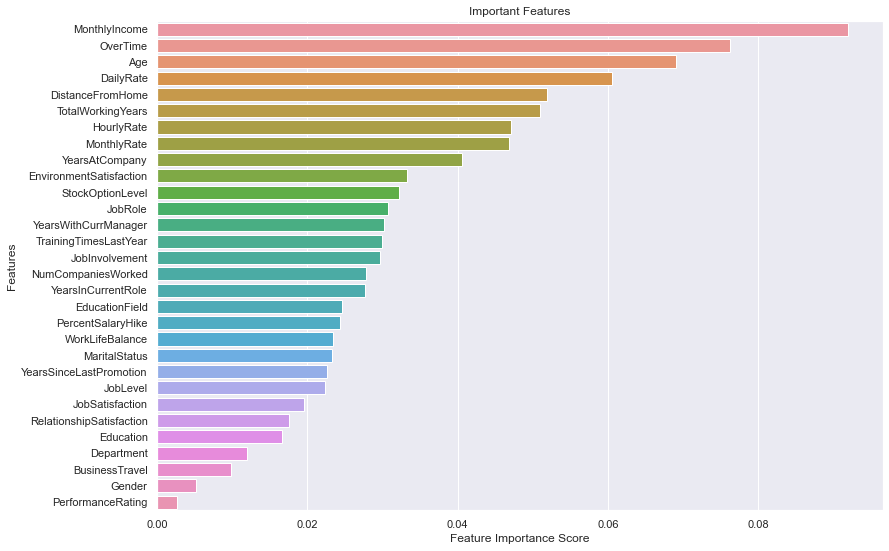

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot using sns
sns.set({'figure.figsize':(13,9)})
sns.barplot(x=feature_imp, y=feature_imp.index)

# Adding labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")

# Displaying the plot
plt.show()